# Boston House Price DataSet

***

Intro

***

In [44]:
# The packages we will be using are as follows:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (20, 10)

In [45]:
#we can also import the dataset as it is available in sklearn
from sklearn.datasets import load_boston          #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [46]:
#by opening the data array, the location is diplaed as filename': 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv' which we can instead pull directly into a pandas DF. 

In [106]:
df0 = pd.read_csv('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv') #or boston['data'] could be used
df1 = pd.DataFrame(df0.values[1:], columns=df0.iloc[0]) # move the 'feature_names' title row to become the Pandas df title   #source: https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
df = df1.astype(float)
df
df.to_excel('Boston Data.xls', encoding = 'utf-8')

In [48]:
#df.isnull().sum()    # will also check if there are any NaN's in each column, here there are not

In [49]:
#round(df.describe(), 3) #describe is a useful function to review the overall parameters of yoru dataset

By calling `boston['feature_names'])` we confirm the titles for each of the columns.

Furthermore, using `boston['DESCR']` gives us the description of each feature in each suburb. 

A summary is presented below:


1. **CRIM**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- per capita crime rate by town 
+ **ZN**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of residential land zoned for lots over 25,000 sq.ft.       
+ **INDUS**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of non-retail business acres per town
+ **CHAS**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      
+ **NOX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- nitric oxides concentration (parts per 10 million)
+ **RM**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- average number of rooms per dwelling
+ **AGE**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of owner-occupied units built prior to 1940       
+ **DIS**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- weighted distances to five Boston employment centres        
+ **RAD**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- index of accessibility to radial highways 
+ **TAX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- full-value property-tax rate per \$10,000      
+ **PTRATIO**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- pupil-teacher ratio by town   
+ **B**        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town       
+ **LSTAT**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- % lower status of the population
+ **MEDV**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Median value of owner-occupied homes in $1000's  

Reviewing the data presented above, I can see that the key features we are interested in during this review are displayed. The MEDV (the mean value of the homes in the suburb) and CHAS (the data documenting which suburbs are by the Charles river) will be particularly relevant to us.


The CHAS is a binary data set meaning that there is only 2 possible entries, '1' if the suburb is by the river and '0'' if it is not. This immediately presents an opportunity for us to split the data into 2 groups to compare. 

In [50]:
df_chas = df1.iloc[:,3].str.contains('1', regex=False)
df_chas1 = pd.concat([df['MEDV'], df_chas], axis=1, sort=False)
df_chas1

chas_t = ((df_chas1[df_chas1['CHAS'] == True]).drop(['CHAS'], axis=1))
chas_f = (df_chas1[df_chas1['CHAS'] == False]).drop(['CHAS'], axis=1)

print('The number of in scope suburbs by the Charles River are', len(chas_t), 'from 506. This set is now called chas_t')

print('The maximum price from the sample of houses close to the river is $',chas_t['MEDV'].max(),'and minimum $', chas_t['MEDV'].min())
print('The mean price is $', chas_t['MEDV'].mean(), 'while the median is $', chas_t['MEDV'].median())
print('')
print('The number of in scope suburbs NOT by the Charles River are', len(chas_f),  'from 506. This set is now called chas_f')
print('The maximum price from the sample of houses away from the river is $',chas_f['MEDV'].max(),'and minimum $', chas_f['MEDV'].min())
print ('The mean price is $', round(chas_f['MEDV'].mean(),2), 'while the median is $', chas_f['MEDV'].median())

print ('NOTE: the MEDV has clearly been capped at $50k for the purpose of this dataset')

The number of in scope suburbs by the Charles River are 35 from 506. This set is now called chas_t
The maximum price from the sample of houses close to the river is $ 50.0 and minimum $ 13.4
The mean price is $ 28.44 while the median is $ 23.3

The number of in scope suburbs NOT by the Charles River are 471 from 506. This set is now called chas_f
The maximum price from the sample of houses away from the river is $ 50.0 and minimum $ 5.0
The mean price is $ 22.09 while the median is $ 20.9
NOTE: the MEDV has clearly been capped at $50k for the purpose of this dataset


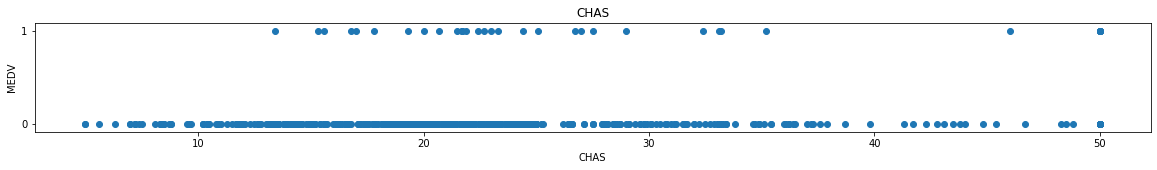

In [52]:
plt.figure(figsize=(20, 2))

features = ['CHAS'] #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = target
    y = df[col]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.yticks(np.arange(0, 1.1, 1.0))
    plt.ylabel('MEDV')

Reviewing the spread of the average prices(MEDV) across the 2 data sets (beside the Charles River(1) or not(0)), confirms that the average price is not very much higher however the min price of 13.4 is geatly influencing the Charles River data set. 

In [53]:
ss.ttest_ind(chas_t, chas_f) #source: Machine Learning Lectures, Dr. Ian McLoughlan

Ttest_indResult(statistic=array([3.99643747]), pvalue=array([7.39062317e-05]))

The ttest between the 2 groups asks the question, what is the probability that the 2 sample groups are from the same overall population? In this case the p value is extremely low and indicates that the the 2 groups are indeed different. 

In [54]:
#plt.hist(chas_t.values)

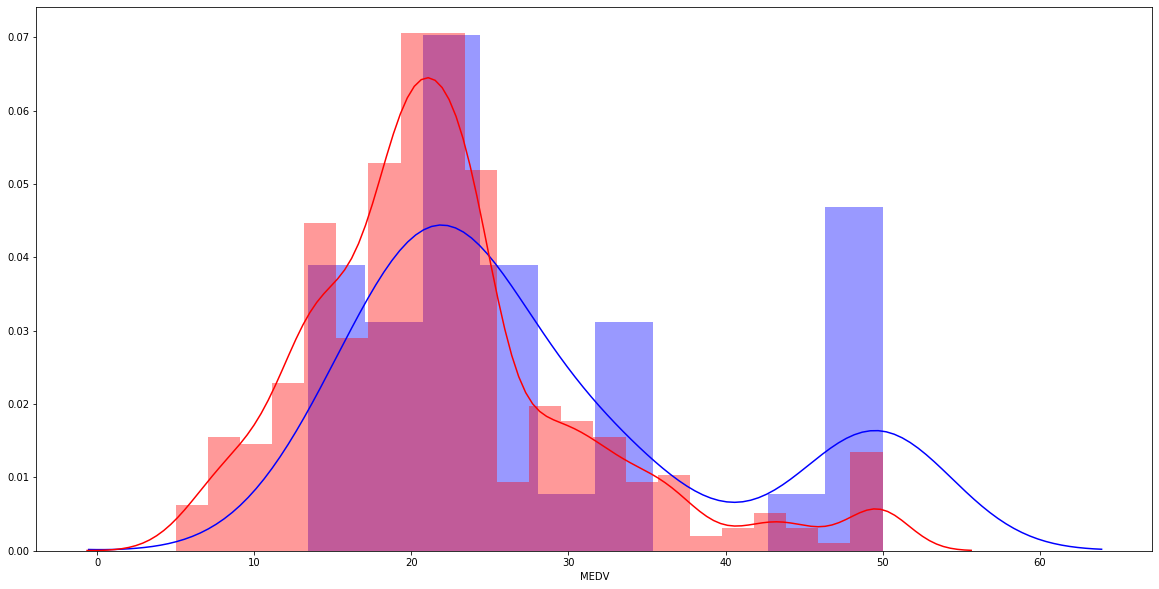

In [55]:
sns.distplot(chas_t, color='b', axlabel='MEDV', bins=10) # houses close to the river are in blue
sns.distplot(chas_f, color='r') # houses farther from the river are in red
#sns.distplot(df['MEDV'], color='k')

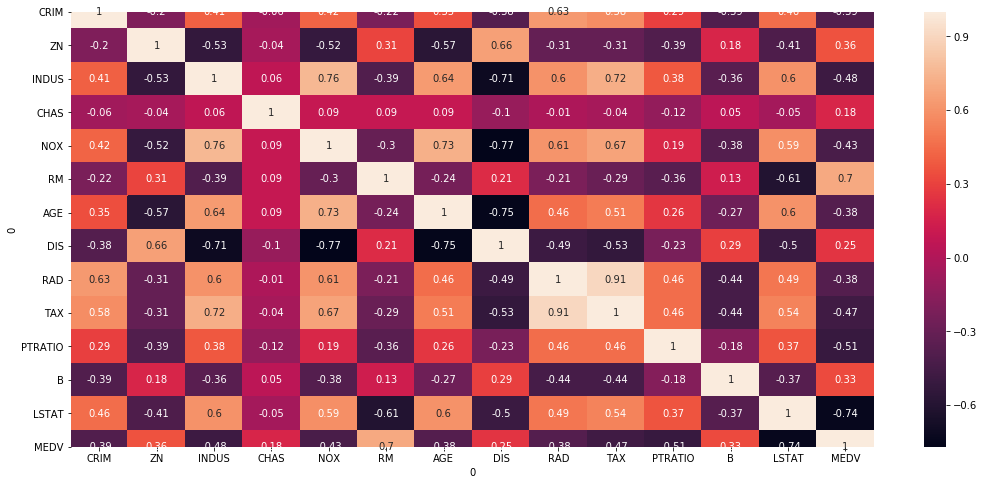

In [62]:
plt.figure(figsize=(18,8))
correlation_matrix = df.corr().round(2) # Source: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

#"The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there 
# is a strong positive correlation between the two variables. When it is close to -1, the variables 
# have a strong negative correlation." i.e. very dark and very light areas are of most interest.

As per the above quote, very dark (close to -1) show a strong negative correlation or very light areas (close to 1) a strong positive correlation.  For example, the strongest positive correlation between RAD and TAX is seen with a score of 0.91. This means the houses with the most accessibility to radial highways are more likely to pay the full-value property-tax rate per $10,000.

In the case of CHAS and MEDV, a score of 0.18 is assigned indicating that there is no significant correlation between the 2 characteristics. Keeping in mind that only 35 houses of 506 are by the Charles River, I feel this test was worth running if even just to discount that thereis no obvious correlation we are overlooking. It could be noted that CHAS does not have any very strong correlations with the other characteristics and MEDV is in fact the strongest.

--------

### What if the size of the property is a factor to consider?
MEDV is a curious feature as it appears to be a total value for the property not taking into account for the size of it. After location, the size or quality of the building are surely the biggest factors influencing price. 

As we do have a column that is an inidicator of size, the average number of rooms per dwelling (RM), I will divide the total price by the average number of rooms to get an indicative square metre price. 

In [20]:
df_sm = df.filter(items=['CHAS', 'RM','MEDV'])
df_sm2 =  df_sm.MEDV / df_sm.RM 
df_sm3 = pd.concat([df_sm, df_sm2], axis=1, sort=False).drop(['RM', 'MEDV'], axis=1)
df_sm3.columns = ('CHAS', 'SME') #SME for Square Metre estimate
#df_sm3

sme_t = (df_sm3[df_sm3['CHAS'] == 0].drop(['CHAS'], axis=1))
sme_f = (df_sm3[df_sm3['CHAS'] == 1].drop(['CHAS'], axis=1))


In [21]:
ss.ttest_ind(sme_t, sme_f)

Ttest_indResult(statistic=array([-4.03428532]), pvalue=array([6.32638216e-05]))

P value is still not close enough 

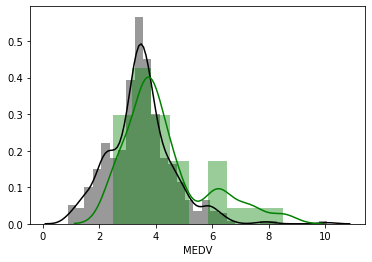

In [22]:
sns.distplot(sme_t, color='k', axlabel='MEDV') # houses close to the river are in b;ack
sns.distplot(sme_f, color='g') # houses farther from the river are in green

---------

# Keras


In [23]:
from tensorflow.python import keras
#print(keras.__version__)

In [40]:
import keras as kr

In [73]:
df1 = df.iloc[:,8].copy()
df1

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 506, dtype: float64

In [92]:
x1 = df[['RAD','TAX']].copy()
#y1 = df.iloc[:,9]
#z1 = pd.concat(x1, y1)
x1

,RAD,TAX
0,1.0,296.0
1,2.0,242.0
2,2.0,242.0
3,3.0,222.0
4,3.0,222.0
...,...,...
501,1.0,273.0
502,1.0,273.0
503,1.0,273.0
504,1.0,273.0


No handles with labels found to put in legend.


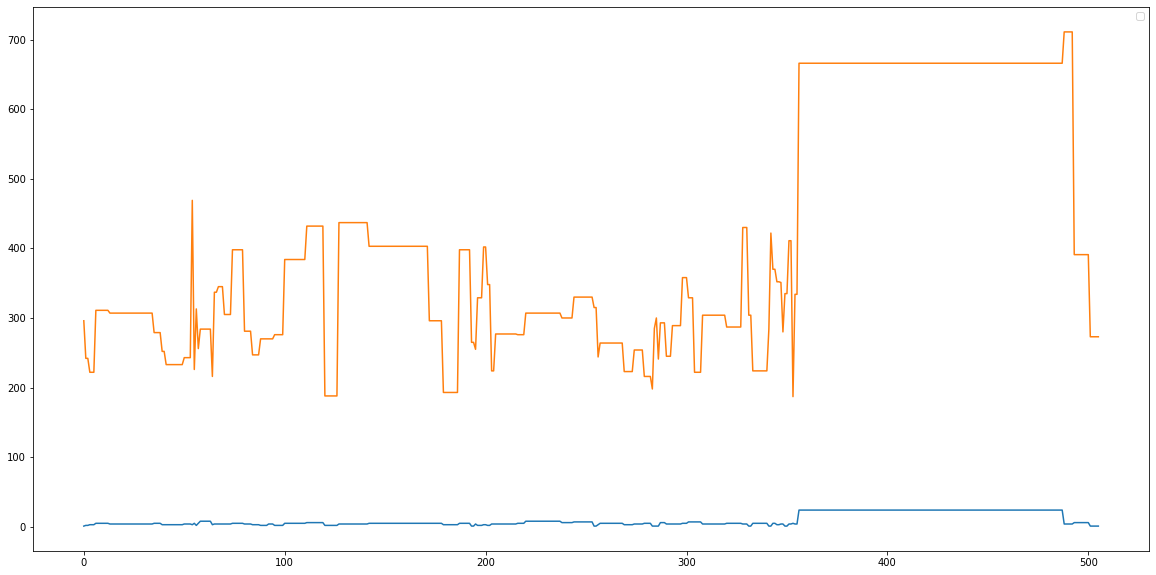

In [91]:
plt.plot(x1)
plt.legend()

Epoch 1/30
506/506 [==============================] - 0s 662us/step - loss: 585.0725
Epoch 2/30
506/506 [==============================] - 0s 107us/step - loss: 568.9967
Epoch 3/30
506/506 [==============================] - 0s 101us/step - loss: 542.2583
Epoch 4/30
506/506 [==============================] - 0s 107us/step - loss: 495.7893
Epoch 5/30
506/506 [==============================] - 0s 101us/step - loss: 423.0214
Epoch 6/30
506/506 [==============================] - 0s 107us/step - loss: 321.7316
Epoch 7/30
506/506 [==============================] - 0s 101us/step - loss: 212.2116
Epoch 8/30
506/506 [==============================] - 0s 99us/step - loss: 126.2344
Epoch 9/30
506/506 [==============================] - 0s 107us/step - loss: 84.6390
Epoch 10/30
506/506 [==============================] - 0s 103us/step - loss: 74.6629
Epoch 11/30
506/506 [==============================] - 0s 99us/step - loss: 71.7026
Epoch 12/30
506/506 [==============================] - 0s 101us/step

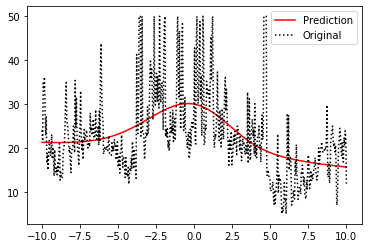

In [32]:
x = np.linspace(-10.0, 10.0, 506)

y = df['MEDV']


# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=1, activation="tanh"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=30,batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

## End